Technique Index, TI
---
To analyze the financial data, using yahoo's data  is not enough; we need more `features`, i.e. TI.

To add more TI's, install C-pachage, ta, in google drive, the linux-based platform, as follows:
1. dawnload ans install ta-lib/ta-lib-0.4.0-src.tar.gz,
2. install Python-wrapper ta package, `Ta-Lib`



In [1]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

--2024-07-06 12:33:04--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-07-06 12:33:05--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://netcologne.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-07-06 12:33:05--  http://netcologne.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1
Res

In [1]:
# or just install the binary package
!pip install ta-lib-bin

In [2]:
import yfinance as yf
import talib

In [3]:
ticker='NVDA'
begin='2024-01-01'
df = yf.download(ticker, begin)

[*********************100%%**********************]  1 of 1 completed


In [4]:
# Simple Moving Average, SMA
# add 20 days moving average
df[f'{ticker}_sma_20'] = talib.SMA(df['Close'].values, timeperiod=20)

In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,NVDA_sma_20
Date,,,,,,,
2024-06-28,124.580002,127.709999,122.750000,123.540001,123.540001,315516700,123.84130
2024-07-01,123.470001,124.839996,118.830002,124.300003,124.300003,284885500,124.57465
2024-07-02,121.129997,123.410004,121.029999,122.669998,122.669998,218374000,124.95815
2024-07-03,121.660004,128.279999,121.360001,128.279999,128.279999,215749000,125.55030
2024-07-05,127.379997,128.850006,125.680000,125.830002,125.830002,213201200,125.71980


<Axes: xlabel='Date'>

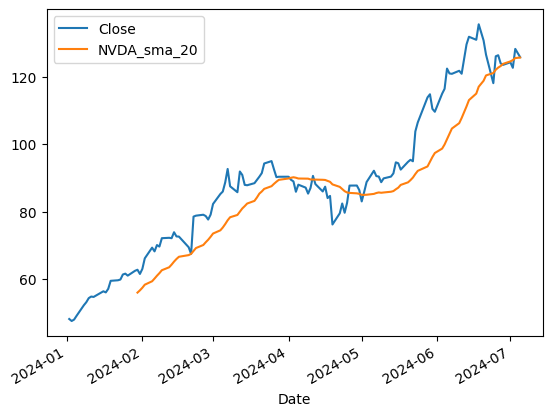

In [6]:
# SMA makes the `Close` curve smoothly
df[['Close', f'{ticker}_sma_20']].plot()

In [7]:
#import string as str
[str.lower(col) for col in list(df.columns)]

['open', 'high', 'low', 'close', 'adj close', 'volume', 'nvda_sma_20']

In [8]:
def df_lower(df):
  df.columns = [str.lower(col) for col in list(df.columns)]
  return df
df1=df_lower(df)

KD
---
1. `RSV`, Raw Stockastic Variable,
$$ \text{ RSV } = \frac{\text{Today}_{\text{Close}} - \text{Lowest}_9}{\text{Highest}_9- \text{Lowest}_9} $$
2. KD
\begin{align*}
 K_t &=& \frac{2}{3}K_{t-1}+\frac{1}{3}\text{RSV}_t\\
D_t &=& \frac{2}{3}D_{t-1}+\frac{1}{3}K_t
\end{align*}
K can be treated as fast line, and the other as slow line.

In [11]:
from talib import abstract

df_kd=abstract.STOCH(df1, fastk_period=9, slowk_period=3, slowd_period=3)


In [12]:
df['slowk']=df_kd['slowk']
df['slowd']=df_kd['slowd']

In [13]:
import seaborn as sns
sns.set()

<Axes: xlabel='Date'>

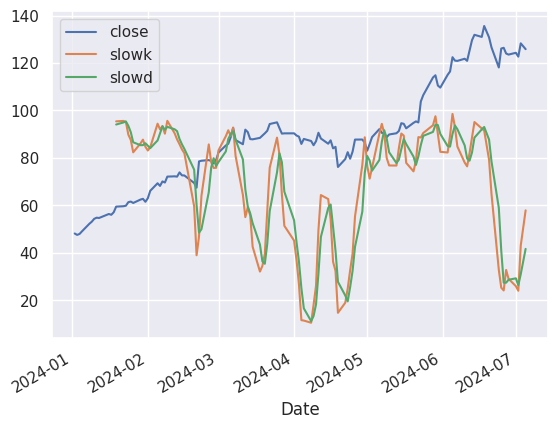

In [14]:
# plot cloase with kd curve
df1[['close', 'slowk', 'slowd']].plot()

Actually, `Close` and `KD` are two plots in different consideration. Note that K,D are within 0-100.

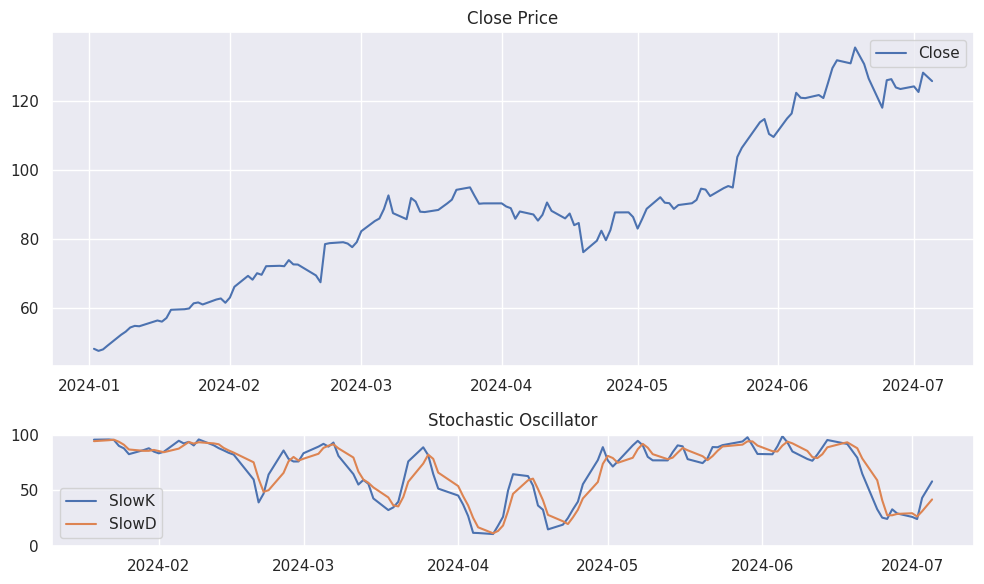

In [15]:
# prompt: make close cureve with subplot kd curve

import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6),gridspec_kw={'height_ratios': [3, 1]},)

# Plot the close price on the first subplot
ax1.plot(df['close'], label='Close')
ax1.set_title('Close Price')
ax1.grid(True)
ax1.legend()

# Plot the slowk and slowd curves on the second subplot
ax2.plot(df['slowk'], label='SlowK')
ax2.plot(df['slowd'], label='SlowD')
ax2.set_title('Stochastic Oscillator')
ax2.set_ylim(0, 100)
ax2.grid(True)
ax2.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.tight_layout()
plt.show()


Enhance TA on Pandas
---

[code](https://medium.com/@kokhua81/stocks-technical-analysis-ta-with-python-chatgpt-a-comprehensive-guide-871a756ebc7c)

In [17]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=7df225ff22e9f28f72ea276a18a7a12f0d5540e5bdbbebfb3c9f1a02b1024f20
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [18]:
#import pandas as pd
#import yfinance as yf
import pandas_ta as ta
#import matplotlib.dates as mdates
from datetime import datetime, timedelta
import matplotlib.dates as mdates

1. MACD, Moving Average Convergence / Divergence,  

In [19]:
# Calculate technical indicators using pandas-ta
df.ta.macd(append=True)
df.ta.rsi(append=True)
df.ta.bbands(append=True)
df.ta.obv(append=True)

Date
2024-01-02    4.112540e+08
2024-01-03    9.035800e+07
2024-01-04    3.968930e+08
2024-01-05    8.119320e+08
2024-01-08    1.454442e+09
                  ...     
2024-06-28    1.096004e+10
2024-07-01    1.124492e+10
2024-07-02    1.102655e+10
2024-07-03    1.124230e+10
2024-07-05    1.102910e+10
Name: OBV, Length: 128, dtype: float64

In [ ]:
df.tail()

,open,high,low,close,adj close,volume,nvda_sma_20,slowk,slowd,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,OBV
Date,,,,,,,,,,,,,,,,,,,
2024-06-21,127.120003,130.630005,124.300003,126.570000,126.570000,655484700,120.409501,64.783199,78.506903,8.953001,0.095178,8.857823,63.982502,125.409977,131.158000,136.906023,8.765036,0.100906,1.121542e+10
2024-06-24,123.239998,124.459999,118.040001,118.110001,118.110001,476060900,121.125050,32.846561,58.948763,7.697592,-0.928185,8.625777,52.247055,116.636039,128.403999,140.171959,18.329585,0.062626,1.073936e+10
2024-06-25,121.199997,126.500000,119.320000,126.089996,126.089996,425787500,122.106100,25.330686,40.986816,7.262868,-1.090328,8.353195,59.746936,115.865981,127.425999,138.986018,18.143893,0.442214,1.116515e+10
2024-06-26,126.129997,128.119995,122.599998,126.400002,126.400002,355159700,122.731050,24.178404,27.451884,6.864234,-1.191169,8.055403,60.009697,117.355779,125.589999,133.824220,13.112860,0.549185,1.152031e+10
2024-06-27,124.000000,126.404999,123.750000,124.669998,124.669998,76329151,123.223300,33.802817,27.770636,6.335683,-1.375776,7.711459,57.744358,117.968195,124.367999,130.767803,10.291721,0.523594,1.144398e+10


In [21]:
df.ta.sma(length=20, append=True)
df.ta.ema(length=50, append=True)

Date
2024-01-02           NaN
2024-01-03           NaN
2024-01-04           NaN
2024-01-05           NaN
2024-01-08           NaN
                 ...    
2024-06-28    109.309767
2024-07-01    109.897619
2024-07-02    110.398497
2024-07-03    111.099732
2024-07-05    111.677390
Name: EMA_50, Length: 128, dtype: float64

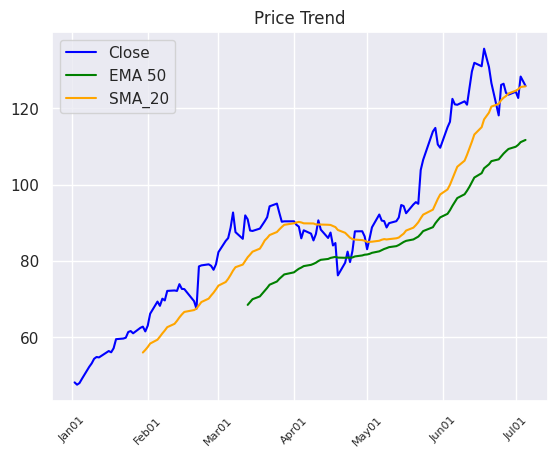

In [23]:
# Price Trend Chart
#plt.subplot(3, 3, 1)
plt.plot(df.index, df['close'], label='Close', color='blue')
plt.plot(df.index, df['EMA_50'], label='EMA 50', color='green')
plt.plot(df.index, df['SMA_20'], label='SMA_20', color='orange')
plt.title("Price Trend")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))  # Format date as "Jun14"
plt.xticks(rotation=45, fontsize=8)  # Adjust font size
plt.legend()



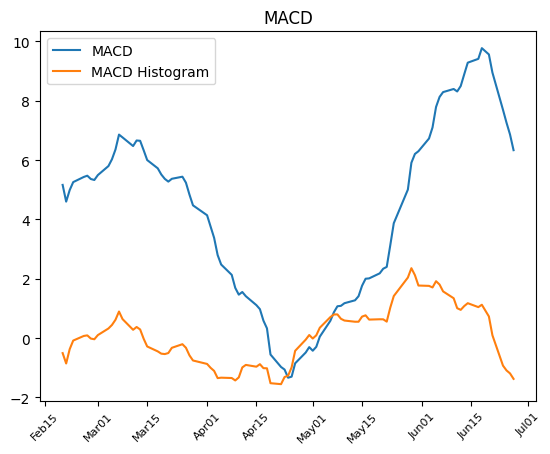

In [ ]:
# MACD Plot
#plt.subplot(3, 3, 3)
plt.plot(df['MACD_12_26_9'], label='MACD')
plt.plot(df['MACDh_12_26_9'], label='MACD Histogram')
plt.title('MACD Indicator')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))  # Format date as "Jun14"
plt.xticks(rotation=45, fontsize=8)  # Adjust font size
plt.title("MACD")
plt.legend()

Text(0.5, 1.0, 'RSI Indicator')

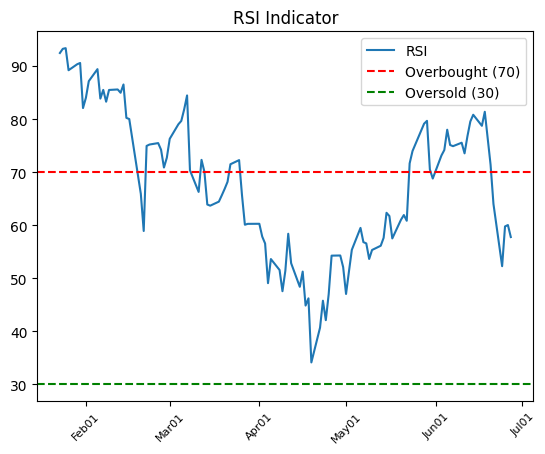

In [ ]:
#plt.subplot(3, 3, 4)
plt.plot(df['RSI_14'], label='RSI')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))  # Format date as "Jun14"
plt.xticks(rotation=45, fontsize=8)  # Adjust font size
plt.title('RSI Indicator')


Bollinger Bands
---
1. Long term: 50 day moving average, bands at 2.5 standard deviations. (2.5 times the standard dev. +/- the SMA)
2. Medium term: 20 day moving average, bands at 2 standard deviations.

3. Short term: 10 day moving average, bands at 1.5 standard deviations.



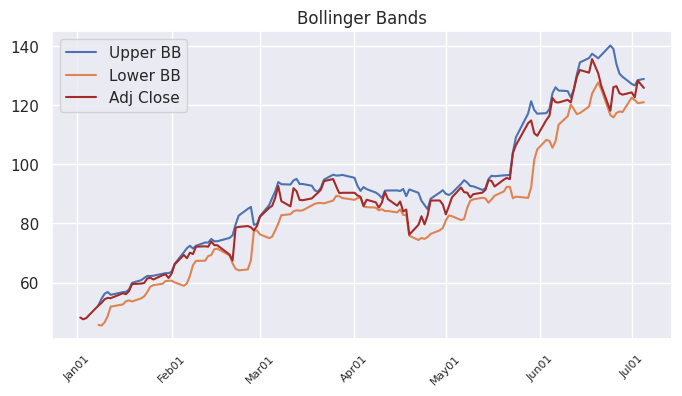

In [27]:
# Bollinger Bands Plot
plt.figure(figsize=(8, 4))
#plt.subplot(3, 3, 5)
plt.plot(df.index, df['BBU_5_2.0'], label='Upper BB')
#plt.plot(df.index, df['BBM_5_2.0'], label='Middle BB')
plt.plot(df.index, df['BBL_5_2.0'], label='Lower BB')
plt.plot(df.index, df['close'], label='Adj Close', color='brown')
plt.title("Bollinger Bands")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))  # Format date as "Jun14"
plt.xticks(rotation=45, fontsize=8)  # Adjust font size
plt.legend()
